In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
import os

In [2]:
Train = ImageDataGenerator(rescale =1/255)
Validate = ImageDataGenerator(rescale =1/255)

In [3]:
Train_dataset = Train.flow_from_directory('./new/Train/',
                                         target_size = (200,200),
                                         batch_size = 10,
                                         class_mode = 'binary')

Found 341 images belonging to 2 classes.


In [4]:
Validation_dataset = Validate.flow_from_directory('./new/Validate/',
                                         target_size = (200,200),
                                         batch_size = 10,
                                         class_mode = 'binary')

Found 47 images belonging to 2 classes.


In [5]:
Train_dataset.class_indices

{'HAPPY': 0, 'NOT HAPPY': 1}

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3) , activation='relu',input_shape = (200,200,3)),
  tf.keras.layers.MaxPooling2D(2,2),
     
  tf.keras.layers.Conv2D(32, (3,3) , activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
     
  tf.keras.layers.Conv2D(64, (3,3) , activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
    
  tf.keras.layers.Conv2D(32, (3,3) , activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
    
  tf.keras.layers.Conv2D(16, (3,3) , activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
    
])

In [7]:
model.compile(optimizer= 'adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
model_fit = model.fit(Train_dataset,
                      epochs = 50,
                     validation_data = Validation_dataset)

Epoch 1/50
35/35 [==============================] - 14s 411ms/step - loss: 0.0504 - accuracy: 0.9853 - val_loss: 2.3070 - val_accuracy: 0.7447
Epoch 2/50
35/35 [==============================] - 14s 402ms/step - loss: 0.1661 - accuracy: 0.9413 - val_loss: 0.9107 - val_accuracy: 0.7447
Epoch 3/50
35/35 [==============================] - 14s 391ms/step - loss: 0.0929 - accuracy: 0.9677 - val_loss: 1.2075 - val_accuracy: 0.7660
Epoch 4/50
35/35 [==============================] - 14s 398ms/step - loss: 0.0417 - accuracy: 0.9883 - val_loss: 2.5473 - val_accuracy: 0.7234
Epoch 5/50
35/35 [==============================] - 13s 372ms/step - loss: 0.1885 - accuracy: 0.9619 - val_loss: 1.3363 - val_accuracy: 0.7234
Epoch 6/50
35/35 [==============================] - 14s 390ms/step - loss: 0.0596 - accuracy: 0.9824 - val_loss: 0.8454 - val_accuracy: 0.8085
Epoch 7/50
35/35 [==============================] - 15s 422ms/step - loss: 0.0335 - accuracy: 0.9941 - val_loss: 1.4387 - val_accuracy: 0.7660

In [14]:
dir_path = 'new/Test'

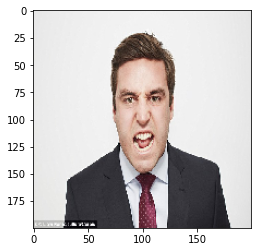

1/1 [==============================] - 0s 56ms/step
 not happy [[1.]]


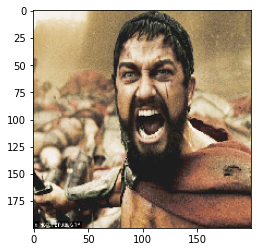

1/1 [==============================] - 0s 46ms/step
 not happy [[1.]]


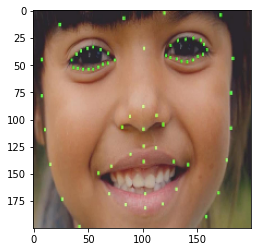

1/1 [==============================] - 0s 41ms/step
 happy [[0.]]


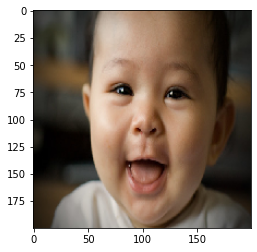

1/1 [==============================] - 0s 61ms/step
 not happy [[1.]]


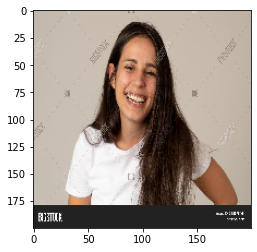

1/1 [==============================] - 0s 48ms/step
 happy [[0.]]


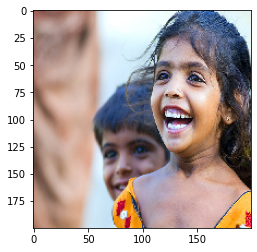

1/1 [==============================] - 0s 47ms/step
 happy [[0.]]


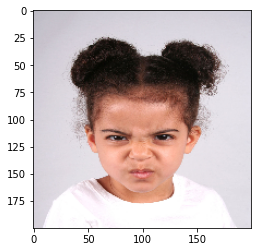

1/1 [==============================] - 0s 46ms/step
 happy [[0.]]


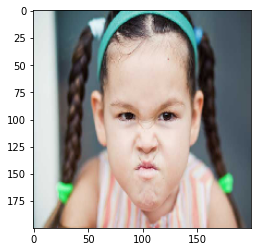

1/1 [==============================] - 0s 48ms/step
 not happy [[1.]]


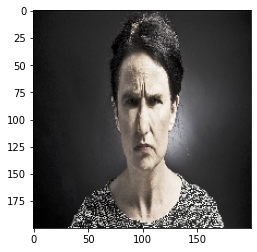

1/1 [==============================] - 0s 47ms/step
 not happy [[1.]]


In [15]:
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size = (200,200))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X =np.expand_dims(X,axis =0)
    images = np.vstack([X])
    Val = model.predict(images)
    if Val ==1:
        print(" not happy",Val)
        
    else:
        print(" happy",Val)